# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {
        'units': units,
        'appid': weather_api_key,
        'q': city
    }
    #city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=params).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | xilin hot
Processing Record 5 of Set 1 | tres lagoas
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | kudat
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | ixtapa
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,16.25,39,20,16.46,CL,1707164577
1,waitangi,-43.9535,-176.5597,19.34,88,98,2.68,NZ,1707164578
2,blackmans bay,-43.0167,147.3167,11.07,76,35,1.85,AU,1707164578
3,xilin hot,43.9667,116.0333,-14.89,96,98,2.24,CN,1707164578
4,tres lagoas,-20.7511,-51.6783,31.41,42,100,3.21,BR,1707164578


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,16.25,39,20,16.46,CL,1707164577
1,waitangi,-43.9535,-176.5597,19.34,88,98,2.68,NZ,1707164578
2,blackmans bay,-43.0167,147.3167,11.07,76,35,1.85,AU,1707164578
3,xilin hot,43.9667,116.0333,-14.89,96,98,2.24,CN,1707164578
4,tres lagoas,-20.7511,-51.6783,31.41,42,100,3.21,BR,1707164578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

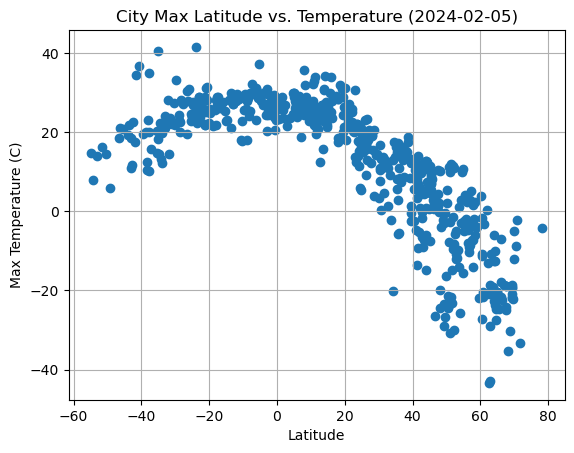

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

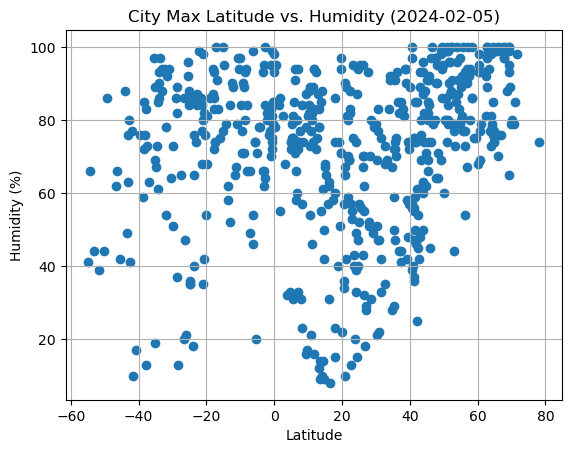

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Max Latitude vs. Humidity ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

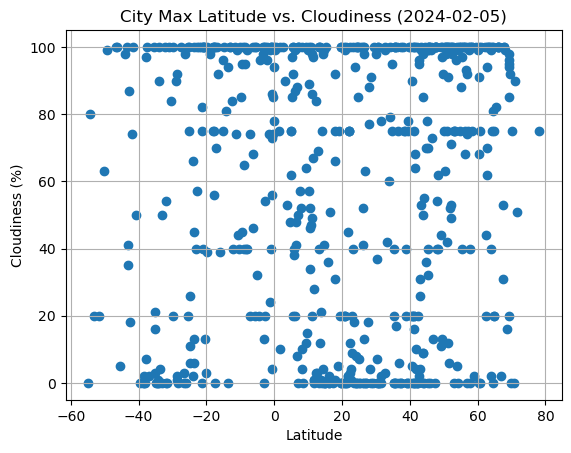

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitude vs. Cloudiness ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

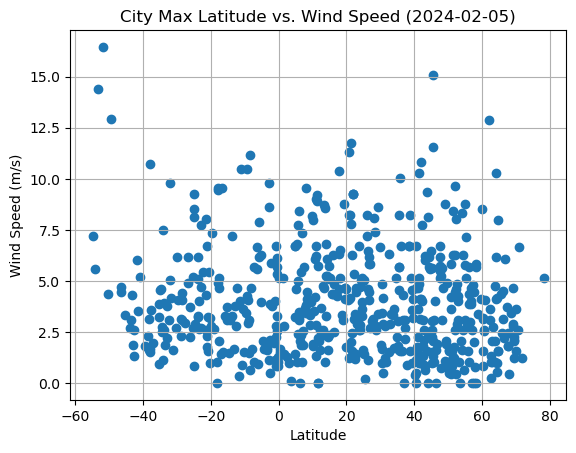

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitude vs. Wind Speed ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def calc_linear_reg(xvals, yvals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvals, yvals)
    regress_values = xvals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return {'line_eq': line_eq, 'rvalue': rvalue, 'regress': regress_values}

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,xilin hot,43.9667,116.0333,-14.89,96,98,2.24,CN,1707164578
5,fortuna,40.5982,-124.1573,10.52,97,20,0.00,US,1707164579
6,iqaluit,63.7506,-68.5145,-19.06,77,100,1.03,CA,1707164579
8,hawaiian paradise park,19.5933,-154.9731,20.02,94,100,4.12,US,1707164579
9,petropavlovsk-kamchatsky,53.0452,158.6483,-11.67,77,75,4.02,RU,1707164580


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,16.25,39,20,16.46,CL,1707164577
1,waitangi,-43.9535,-176.5597,19.34,88,98,2.68,NZ,1707164578
2,blackmans bay,-43.0167,147.3167,11.07,76,35,1.85,AU,1707164578
4,tres lagoas,-20.7511,-51.6783,31.41,42,100,3.21,BR,1707164578
7,grytviken,-54.2811,-36.5092,7.98,66,80,5.59,GS,1707164579


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8735193675252171


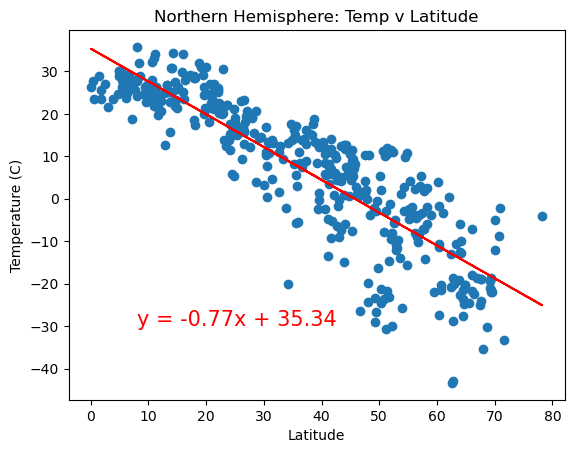

In [15]:
# Linear regression on Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Max Temp']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (8,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere: Temp v Latitude')
plt.show()

The r-value is: 0.5256317168475293


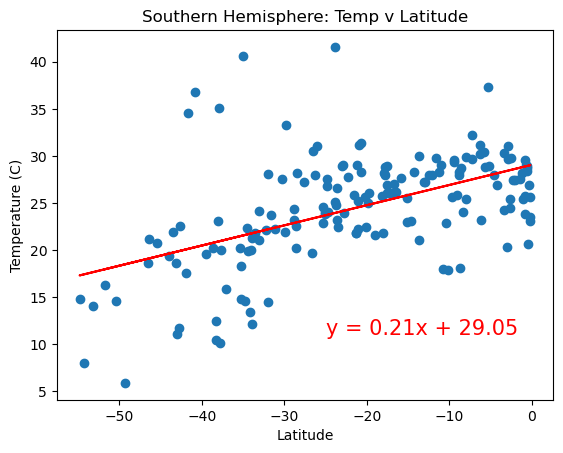

In [16]:
# Linear regression on Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Max Temp']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Hemisphere: Temp v Latitude')
plt.show()

### Discussion about the linear relationship: As expected, the regression equations for the hemispheres confirm that temperature values rise as the lattitude approaches zero (positive slope for the Southern hemisphere). Conversely, as the latitude moves away from the equator (towards +/- 90 degrees) we see a negative slope (or towards cooler temperatures). The northern hemisphere displays a much higher correlation between latitude and temperature - an rscore of -0.85 as opposed to 0.50 for the south.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40783302147992784


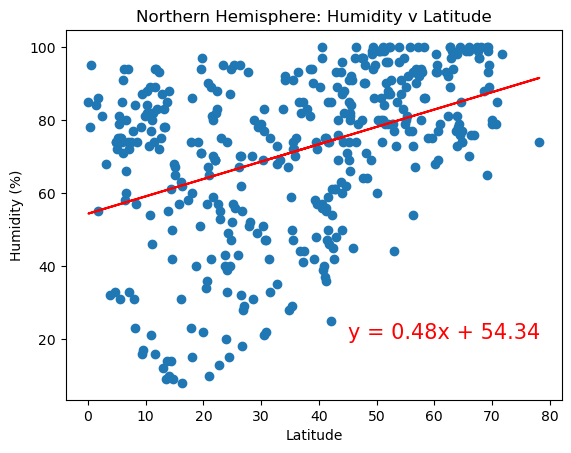

In [17]:
# Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Humidity']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity v Latitude')
plt.show()

The r-value is: 0.2951030261046971


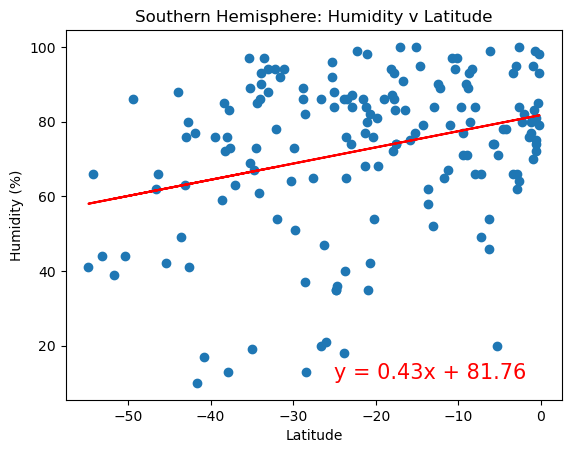

In [18]:
# Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Humidity']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity v Latitude')
plt.show()

### Discussion about the linear relationship: Humidity has a lower correlation to latitude than does the temperature. Here again the northern hemisphere shows greater correlation (0.50 to 0.16). This may partially be due to the higher humidity values of the southern hemisphere - a y-intercept of 77.56 puts more values near the higher limit, and a flatter slope to the regression shows less change across the sample.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17873797552123766


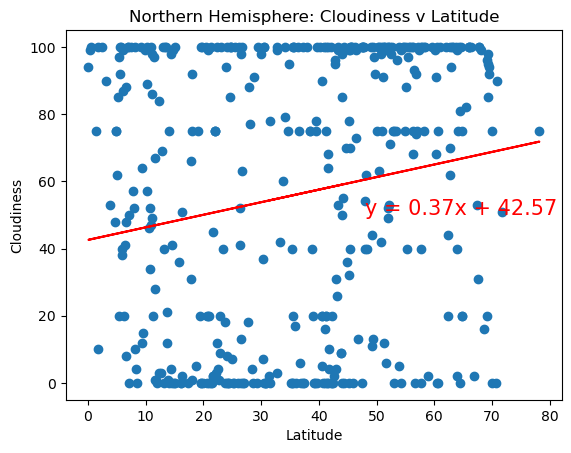

In [19]:
# Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Cloudiness']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (48,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness v Latitude')
plt.show()

The r-value is: 0.2666563351219888


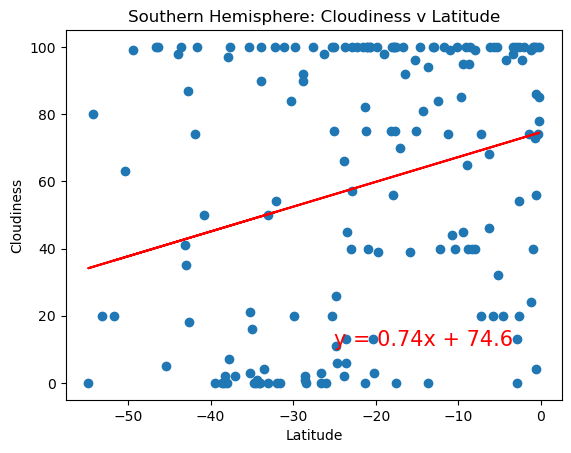

In [20]:
# Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Cloudiness']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness v Latitude')
plt.show()

### Discussion about the linear relationship: With regards to the Cloudiness measure, there is a weaker correlation to latitude than in the previous graph sets. Both measure ~ +/- 0.25, registering as fairly weak. What is counterintuitive here is that for Cloudiness, values increase both as you move towards the equator in the Southern Hemisphere, and as you move away from the equator in the Northern hemisphere. This is contradictory to what was seen regarding temperature. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12799768232689476


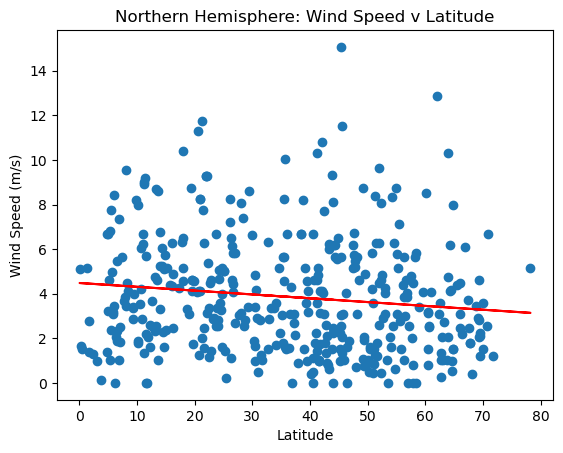

In [21]:
# Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Wind Speed']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (13,18.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Wind Speed v Latitude')
plt.show()

The r-value is: -0.16431778482559245


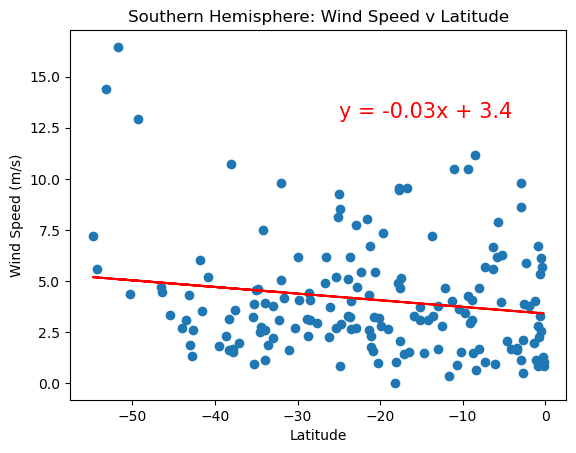

In [22]:
# Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Wind Speed']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Wind Speed v Latitude')
plt.show()

### Discussion about the linear relationship: Average windspeed showed very little correlation with latitude, especially in the Northern hemisphere. With an r-score of 0.05 and a regression slope of 0.01, winds would appear to be fairly consistent throughout. The Southern hemisphere shows a slightly higher rate of change (slope = -0.05) as one approaches the equator but does still not appear to be significant. 